In [1]:
#Importing Required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns

## Email: Electronic mail which is used to communicate
## Spam : Unecassary,fraud,promotions
## Ham : Necessary mails

# Business problem
## Disdavantages of Spam
- Malware (virus)
- Fishing mails(Honey trap)
- Sorting time
- Privacy issues

In [2]:
df=pd.read_csv(r"C:\Users\RAGHAVENDRA KUMAR\Downloads\spam.csv")
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
df["Category"].value_counts()/len(df)*100

Category
ham     86.593683
spam    13.406317
Name: count, dtype: float64

<Axes: xlabel='Category', ylabel='count'>

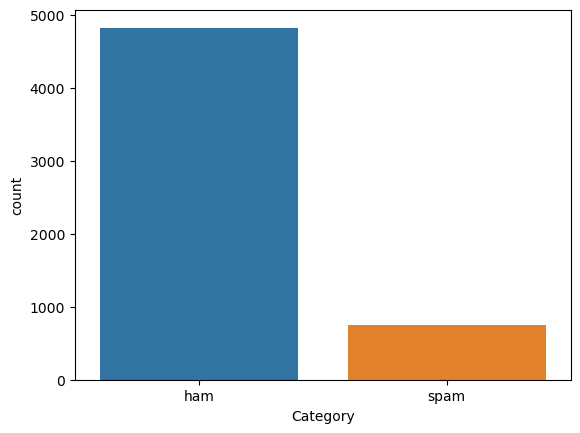

In [4]:
sns.countplot(x=df["Category"],hue=df["Category"])

In [5]:
df.loc[df["Category"]=="spam"]

,Category,Message
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...


In [6]:
spam_email=df.loc[df["Category"]=="spam","Message"]
spam_email

2       Free entry in 2 a wkly comp to win FA Cup fina...
5       FreeMsg Hey there darling it's been 3 week's n...
8       WINNER!! As a valued network customer you have...
9       Had your mobile 11 months or more? U R entitle...
11      SIX chances to win CASH! From 100 to 20,000 po...
                              ...                        
5537    Want explicit SEX in 30 secs? Ring 02073162414...
5540    ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547    Had your contract mobile 11 Mnths? Latest Moto...
5566    REMINDER FROM O2: To get 2.50 pounds free call...
5567    This is the 2nd time we have tried 2 contact u...
Name: Message, Length: 747, dtype: object

In [7]:
spam_words=" ".join(spam_email.values)
spam_words

'Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C\'s apply 08452810075over18\'s FreeMsg Hey there darling it\'s been 3 week\'s now and no word back! I\'d like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only. Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030 SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info URGENT! You have won a 1 week FREE membership in our £100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18 XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message o

In [8]:
#!pip install wordcloud

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

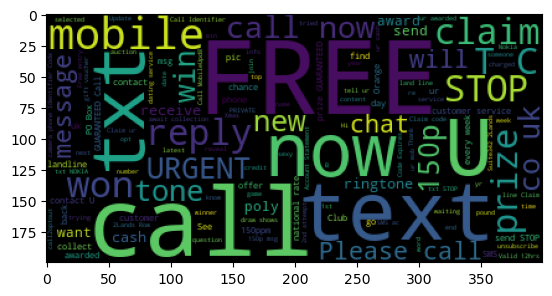

In [11]:
cloud=WordCloud().generate(spam_words)
plt.imshow(cloud)

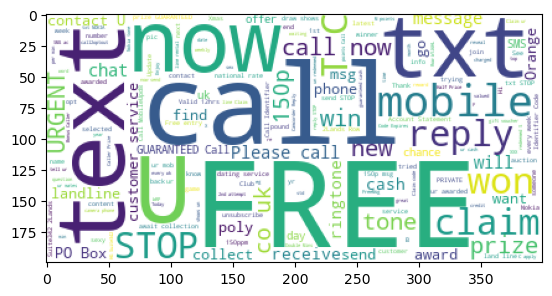

In [12]:
cloud=WordCloud(background_color="white").generate(spam_words)
plt.imshow(cloud)

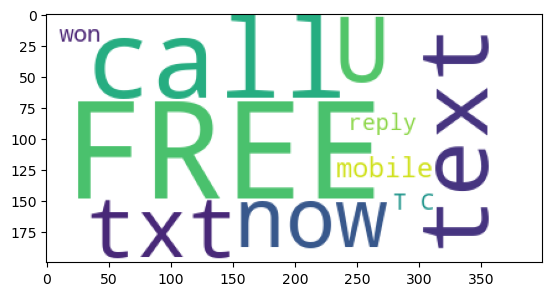

In [13]:
cloud=WordCloud(background_color="white",max_words=10).generate(spam_words)
plt.imshow(cloud)

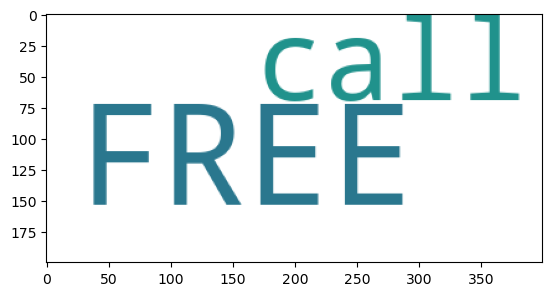

In [14]:
cloud=WordCloud(background_color="white",max_words=2).generate(spam_words)
plt.imshow(cloud)

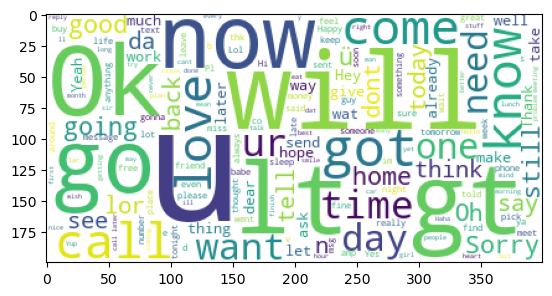

In [15]:
ham_email=df.loc[df["Category"]=="ham","Message"]
ham_words=" ".join(ham_email.values)
hamcloud=WordCloud(background_color="white").generate(ham_words)
plt.imshow(hamcloud)

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
tfidf=CountVectorizer(stop_words="english")

In [19]:
import pickle
pickle.dump(tfidf,open("tfidf_vectorization.pkl","wb"))
vect=pickle.load(open("tfidf_vectorization.pkl","rb"))
vect

CountVectorizer(stop_words='english')

In [17]:
x=df.drop("Category",axis=1)
y=df["Category"]

In [18]:
tfidf.fit_transform(x["Message"]).toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [19]:
X=pd.DataFrame(tfidf.fit_transform(x["Message"]).toarray(),columns=tfidf.get_feature_names_out())
X

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,èn,ú1,〨ud
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
X.columns.values

array(['00', '000', '000pes', ..., 'èn', 'ú1', '〨ud'], dtype=object)

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=23)

## KNN 

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.9022421524663677

# Naive bayes

In [23]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
NB=MultinomialNB()
NB.fit(X_train,y_train)
y_pred=NB.predict(X_test)
accuracy_score(y_test,y_pred)

0.9820627802690582

# Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
Logr=LogisticRegression()
Logr.fit(X_train,y_train)
y_pred=Logr.predict(X_test)
accuracy_score(y_test,y_pred)

0.9820627802690582

# Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dc=DecisionTreeClassifier()
dc.fit(X_train,y_train)
y_pred=dc.predict(X_test)
accuracy_score(y_test,y_pred)

0.9659192825112107

# Model deployment

In [26]:
import warnings
warnings.filterwarnings("ignore")
email=input("Enter the email : ")
data=tfidf.transform([email]).toarray()
NB.predict(data)[0]


Enter the email :  wow. Congratulations.. you won a lottery


'spam'

In [27]:
def  mail_tester(email):
    data = tfidf.transform([email]).toarray()
    return NB.predict(data)[0]

In [28]:
mail_tester("wow. Congratulations.. you won a lottery")

'spam'

In [29]:
df1=pd.read_csv(r"C:\Users\RAGHAVENDRA KUMAR\Downloads\emails (1).csv")

In [30]:
df1

,Email
0,Congratulations! You've won a free gift card. ...
1,Urgent: Your account has been compromised. Upd...
2,Get cheap prescription drugs online. No prescr...
3,Earn $5000 per week working from home. Sign up...
4,Limited time offer! Buy one get one free. Act ...
5,Exclusive deal: Save 50% on all products. Visi...
6,You have received a confidential message from ...
7,Get a loan approved instantly. No credit check...
8,Win a brand new car! Enter our sweepstakes now.
9,Free trial! Lose weight fast with our new supp...


In [31]:
df1["Result"]=df1["Email"].apply(mail_tester)

In [32]:
df1

,Email,Result
0,Congratulations! You've won a free gift card. ...,spam
1,Urgent: Your account has been compromised. Upd...,spam
2,Get cheap prescription drugs online. No prescr...,ham
3,Earn $5000 per week working from home. Sign up...,ham
4,Limited time offer! Buy one get one free. Act ...,ham
5,Exclusive deal: Save 50% on all products. Visi...,spam
6,You have received a confidential message from ...,spam
7,Get a loan approved instantly. No credit check...,ham
8,Win a brand new car! Enter our sweepstakes now.,spam
9,Free trial! Lose weight fast with our new supp...,ham


In [33]:
import pickle
pickle.dump(NB,open("Email_spam_ham.pkl","wb"))
model=pickle.load(open("Email_spam_ham.pkl","rb"))
model

MultinomialNB()

In [35]:
import warnings
warnings.filterwarnings("ignore")
email=input("Enter the email : ")
data=tfidf.transform([email]).toarray()
NB.predict(data)[0]


Enter the email :  wow. Congratulations.. you won a lottery


'spam'

In [36]:
model.predict(data)[0]

'spam'

In [37]:
data

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)